In [1]:
from tensorflow.keras import datasets, utils, models, layers, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt

## Data Preparation

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Preprocessing
X_train = train_images.reshape(60000, 28, 28, 1)
X_test = test_images.reshape(10000, 28, 28, 1)

# Normalizing (0-1)
X_train = X_train.astype('float32') / 255
X_test =  X_test.astype('float32') / 255

Y_train = utils.to_categorical(train_labels)
Y_test = utils.to_categorical(test_labels)

print(train_labels[0])
print(Y_train[0])

11493376/11490434 [==============================] - 0s 0us/step
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Model Creation

In [ ]:
myInput = layers.Input(shape=(28,28,1))
## the first Conv layer has 32 Filters and the size of them are 3*3 the output size would be the half the output would be 14*14 
conv1 = layers.Conv2D(32, 3, activation='relu', padding='same', strides=2)(myInput)
conv2 = layers.Conv2D(64, 3, activation='relu', padding='same', strides=2)(conv1)

# Change the image to vector in order to be connected to the dense layer
flat = layers.Flatten()(conv2)

#10 class because we have 10 digits
out_layer = layers.Dense(10, activation='softmax')(flat)

myModel = models.Model(myInput, out_layer)

myModel.summary()
myModel.compile(optimizer=optimizers.SGD(lr=0.001), loss=losses.categorical_crossentropy)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                15690     
Total params: 20,490
Trainable params: 20,490
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Train and Evaluation

In [ ]:
history = myModel.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.2)

Epoch 1/50
375/375 [==============================] - 1s 4ms/step - loss: 0.2796 - val_loss: 0.2655
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - val_loss: 0.2643
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2766 - val_loss: 0.2636
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2753 - val_loss: 0.2619
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2737 - val_loss: 0.2607
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2723 - val_loss: 0.2596
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2709 - val_loss: 0.2587
Epoch 8/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2694 - val_loss: 0.2570
Epoch 9/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2679 - val_loss: 0.2560
Epoch 10/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2665 - val_loss: 0.2546

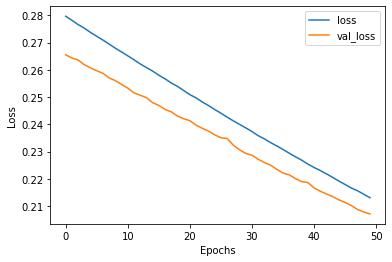

In [ ]:
# Plot Losses
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses)
plt.plot(val_losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])

313/313 [==============================] - 1s 2ms/step - loss: 0.2015
test loss:  0.20152148604393005


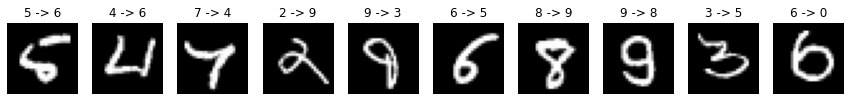

In [ ]:
# Evaluation on Test Data
test_loss = myModel.evaluate(X_test, Y_test)
print("test loss: ", test_loss)

test_labels_p = myModel.predict(X_test)
test_labels_p = np.argmax(test_labels_p, axis=1)

n = 0
f, axs = plt.subplots(1,10,figsize=(15,15))
for i in range(len(test_labels)):
    if n >= 10:
      break
    if (test_labels_p[i] != test_labels[i]):
      axs[n].imshow(test_images[i], cmap='gray')
      axs[n].set_title(f'{test_labels[i]} -> {test_labels_p[i]}')
      axs[n].axis('off')
      n = n+1